L'objectif du TP est :

- d'implémenter l'estimation du flot optique par la méthode de Lucas-Kanade : l'estimation se fera uniquement en certains points de l'image, obtenus grâce à la fonction cv.goodFeaturesToTrack

- d'utiliser une fonction de OpenCV pour l'estimation dense du flot optique cv.calcOpticalFlowFarneback

- de comparer les 2 estimations obtenues.

On appliquera l'estimation de mouvement entre les 2 images ci-dessous, et on l'affichera soit sous forme de champ de vecteurs ou comme une image HSV.

In [103]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

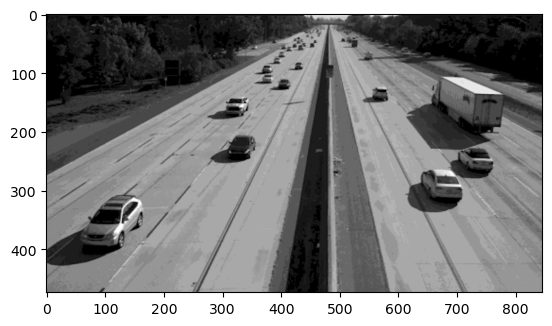

In [110]:
img1=cv.imread('frame2.png')
img1 = cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
plt.imshow(img1,cmap='gray')

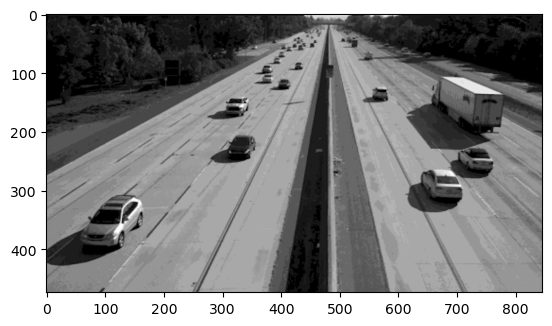

In [111]:
img2=cv.imread('frame21.png')
img2 = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
plt.imshow(img2,cmap='gray')

In [106]:
corner1=cv.goodFeaturesToTrack(img1,1000,0.01,10)
corner2=cv.goodFeaturesToTrack(img2,1000,0.01,10)
corner1=corner1.astype(int)
corner1=corner1.reshape((655, 2))
corner2=corner2.astype(int)
corner2=corner2.reshape((655, 2))

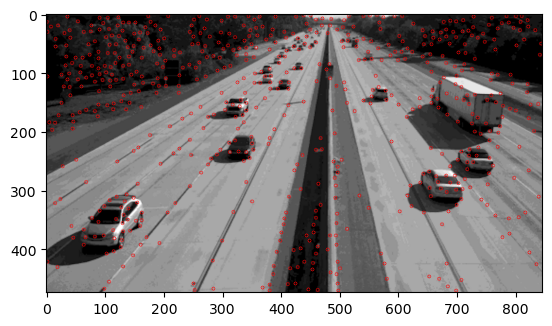

In [17]:
img1 = cv.cvtColor(img1,cv.COLOR_GRAY2BGR)
for i in corner1: cv.circle(img1,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img1,cmap='gray')

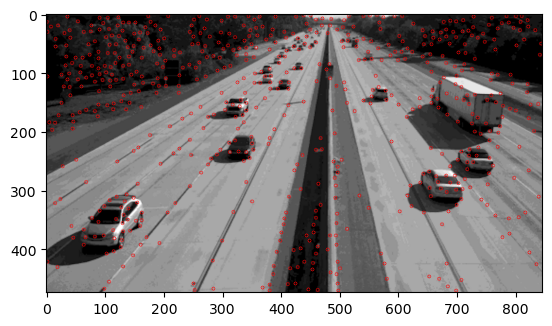

In [18]:
img2 = cv.cvtColor(img2,cv.COLOR_GRAY2BGR)
for i in corner2: cv.circle(img2,center=(i[0],i[1]),radius=3,color=[255,0,0],thickness=1)
plt.imshow(img2,cmap='gray')

In [165]:
flow=cv.calcOpticalFlowFarneback(corner1,corner2, None, 0.5, 3, 15, 5, 7, 1.5, 0)

In [166]:
u=np.array([i[0] for i in flow])
v=np.array([i[1] for i in flow])


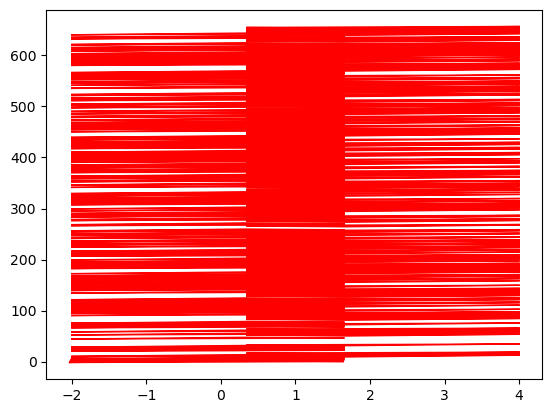

In [167]:
S=np.shape(corner1)
for i in range(S[0]):
        for j in range(S[1]):
            if abs(u[i,j])>1e-16 or abs(v[i,j])>1e-16:
                plt.arrow(j,i,15*v[i,j],15*u[i,j], head_width = 2, head_length = 4, color = "r")

In [142]:
corner1[0]

array([155, 321])

In [143]:
flow[0]

array([[ 0.0000000e+00, -7.6491343e-17],
       [ 0.0000000e+00, -8.8535020e-17]], dtype=float32)

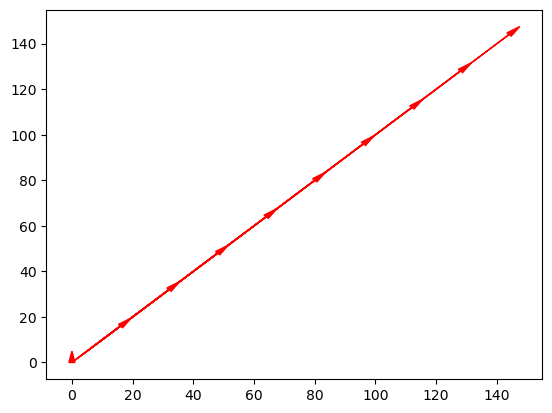

In [99]:
x=[i for i in range(10)]
y=[i for i in range(10)]
for i in range(10):
     plt.arrow(x[i],x[i],15*x[i],15*x[i], head_width = 2, head_length = 5, color = "r")